# Decision Tree

In [215]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

for more information
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [216]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [236]:
clf = DecisionTreeClassifier(max_leaf_nodes=10)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.9473684210526315
0.9583333333333334


### Messing with train data

In [227]:
import numpy as np

X_train = np.append(X_train, [X_train[0]], axis=0)
y_train = np.append(y_train, [0], axis=0)

In [228]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.9473684210526315
0.9743589743589743


In [229]:
import random

for _ in range(3):
    X_train = np.append(X_train, [X_train[0]], axis=0)
    y_train = np.append(y_train, random.sample([0,1,2], 1), axis=0)

In [230]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.9473684210526315
0.9583333333333334


# Visualizing DT

In [231]:
feature_cols = ['feature'+str(i) for i in range(len(X[0]))]

In [232]:
feature_cols

['feature0', 'feature1', 'feature2', 'feature3']

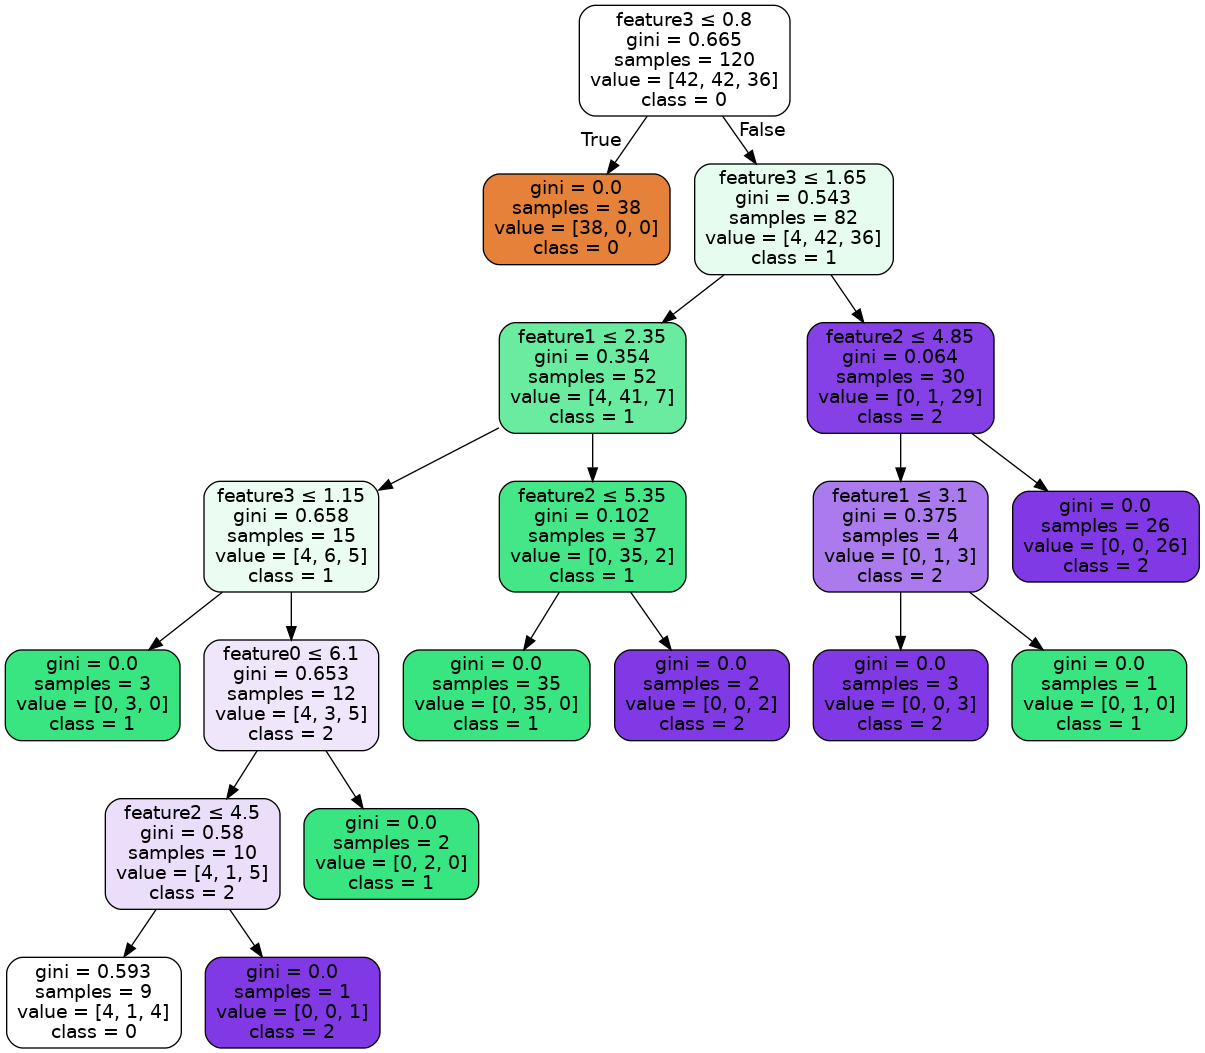

In [237]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO 
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# SVM

In [238]:
from sklearn.svm import SVC

In [239]:
clf = SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.9736842105263158
0.925


<img src="files/svm.png">

Try to generate datasets like this, fit SVM on each of them and find best regularization parameter for each (use CV).

Dataset settings
- 2 features
- not more than 10k points (or you will probably struggle)
- you can either try generating from distributions, and maybe removing some elements after 
- or you can just generate by some functions, this would be easier, but it is OK